In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        # how many Layers?
        # Input Layer(4 features) --> h1 N --> h2 N --> output(3 classes)
       
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
        
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


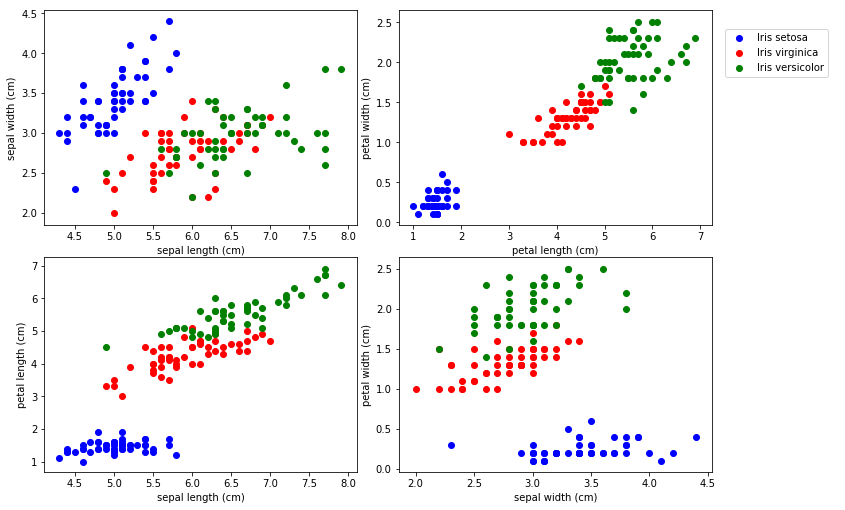

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [8]:
X = df.drop('target', axis = 1)
y = df['target']

In [9]:
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

C:\Users\Seedevice\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr= 0.01)

In [14]:
model.parameters()

<generator object Module.parameters at 0x0000024B5C6FA138>

In [15]:
model.parameters


<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
#Epochs?
#An epoch, 1 run through all the training data

epochs = 100
losses = []



for i in range(epochs):
    
    #Forward and get a prediction
    y_pred = model.forward(X_train)
    
    # calculate Loss/error
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i %10==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    # BackPropatgation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    

Epoch 0 and loss is: 1.1507115364074707
Epoch 10 and loss is: 0.9377316832542419
Epoch 20 and loss is: 0.7798274755477905
Epoch 30 and loss is: 0.6099672317504883
Epoch 40 and loss is: 0.40083548426628113
Epoch 50 and loss is: 0.25436991453170776
Epoch 60 and loss is: 0.15052440762519836
Epoch 70 and loss is: 0.100861556828022
Epoch 80 and loss is: 0.08127662539482117
Epoch 90 and loss is: 0.07230935245752335


Text(0.5, 0, 'EPOCH')

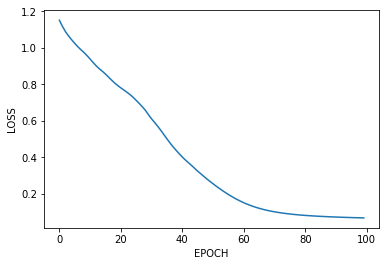

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('EPOCH')

In [18]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [19]:
loss

tensor(0.0581)

In [20]:
correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}) {y_val.argmax().item()} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
            
print(f'We got {correct} correct!')

1) 1 1
2) 1 1
3) 0 0
4) 1 1
5) 2 2
6) 2 2
7) 0 0
8) 0 0
9) 2 2
10) 2 2
11) 2 2
12) 0 0
13) 2 2
14) 1 1
15) 2 2
16) 1 1
17) 2 2
18) 0 0
19) 1 1
20) 2 2
21) 0 0
22) 0 0
23) 2 2
24) 0 0
25) 2 2
26) 2 2
27) 1 1
28) 1 1
29) 2 2
30) 2 2
We got 30 correct!


In [21]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [22]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [23]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [24]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

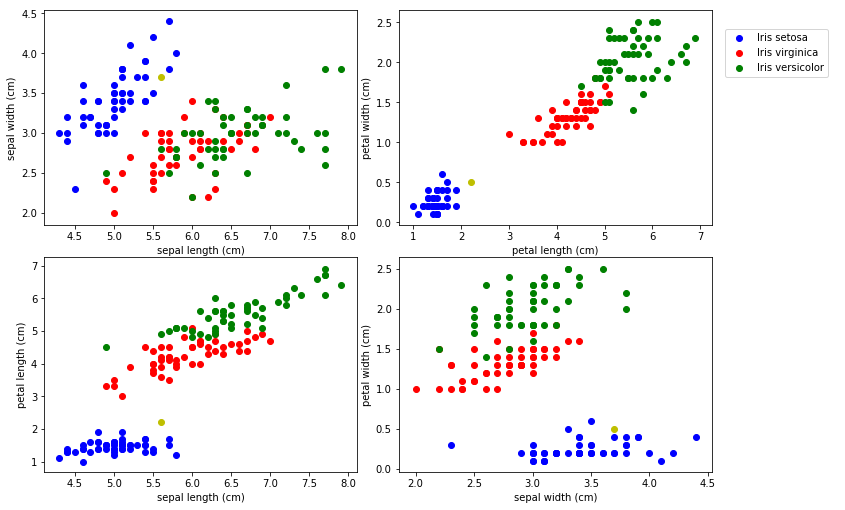

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
    ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color = 'y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [28]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
